### Autor: Pablo Veloz M
## Desafío - Random Forest

__Descripción__
- Para esta sesión trabajaremos con una base de datos sobre los precios de inmuebles en la ciudad de Ames, Iowa. La base se compone de 2930 registros y contiene un gran número de atributos.
- Nuestro objetivo es generar un modelo que prediga de forma adecuada los precios de inmuebles, medidos con la variable Sale_Price .
- A diferencia de otras sesiones donde implementábamos el preprocesamiento a mano, ahora haremos uso de los archivos serializados en la sesión pasada.

__Ejercicio 1: Preparación del ambiente de trabajo__
- Importe las librerías clásicas a utilizar.
- Para este ejercicio Random Forest de Regresión De manera adicional importe las funciones y clases necesarias para generar un desempeño de métricas en problemas de regresión.
- Elimine la columna 'Unnamed: 0' cuando cargue los datos.

In [1]:
import aux_funciones as auxiliares
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import warnings
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  mean_squared_error, median_absolute_error, r2_score
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
import pickle
from joblib import load

__Ejercicio 2: Importación de archivos serializados__
- Importe su modelo entrenado y sus conjuntos de entrenamiento y validación serializados la sesión pasada y evalúe el desempeño del modelo de su compañero con el suyo ¿Cuál es mejor? Si no puede ejecutar el modelo, comente cuáles pueden ser los causantes.
- No es necesario que realice diagnósticos gráficos sobre el modelo, sólo reporte sus métricas. 
- Para importar un archivo serializado, puede ocupar la siguiente línea de código:

In [2]:
from sklearn.externals import joblib 
pablo_model = joblib.load('./pvelozmrandomforest/pablo-veloz-actividad07.sav')  

In [3]:
X_test_pablo = pd.read_csv('./pvelozmrandomforest/X_test')
X_train_pablo = pd.read_csv('./pvelozmrandomforest/X_train')
y_train_pablo = pd.read_csv('./pvelozmrandomforest/y_train',names=["Sale_Prices"])
y_test_pablo = pd.read_csv('./pvelozmrandomforest/y_test',names=["Sale_Prices"])

In [4]:
y_hat = pablo_model.predict(X_test_pablo)

In [5]:
print("Test MSE: ", mean_squared_error(y_test_pablo, y_hat))
print("Test MAE: ", median_absolute_error(y_test_pablo, y_hat))
print("Test R2: ", r2_score(y_test_pablo, y_hat))

Test MSE:  0.047456449955142484
Test MAE:  0.09892680710307289
Test R2:  0.7202880863993226


In [6]:
tania_model = joblib.load('./pvelozmrandomforest/Tania-Estay-ArbolesRegresion') 
X_test_tania = pd.read_csv('./pvelozmrandomforest/X_test_Tania')
X_train_tania = pd.read_csv('./pvelozmrandomforest/X_train_Tania')
y_train_tania= pd.read_csv('./pvelozmrandomforest/Y_train_Tania',names=["Sale_Prices"])
y_test_tania= pd.read_csv('./pvelozmrandomforest/Y_test_Tania',names=["Sale_Prices"])
y_hat_tania = tania_model.predict(X_test_tania)

In [7]:
print("Test MSE: ", mean_squared_error(y_test_tania, y_hat))
print("Test MAE: ", median_absolute_error(y_test_tania, y_hat))
print("Test R2: ", r2_score(y_test_tania, y_hat_tania))

Test MSE:  0.3162850638404494
Test MAE:  0.35013948472413503
Test R2:  0.7819930856812691


In [8]:
metricas=['MSE','MAE','R2'] 
modelo_Pablo=[0.04745,0.09892,0.72028]
modelo_Tania=[0.3162,0.35013,0.78199]
modelo3=[0,0,0]
listado = list(zip(metricas,modelo_Pablo,modelo_Tania,modelo3))
pd.DataFrame(listado, columns = ['metricas','Modelo Pablo','modelo Tania','modelo3'])

,metricas,Modelo Pablo,modelo Tania,modelo3
0,MSE,0.04745,0.31620,0
1,MAE,0.09892,0.35013,0
2,R2,0.72028,0.78199,0


__Ejercicio 3: Evaluación Random Forest__
- En base a los conjuntos de entrenamiento serializados, genere un modelo utilizando sklearn.ensemble.RandomForest sin modificar hiperparámetros, sólo declarando la semilla pseudoaleatoria.
- Reporte su desempeño y compárelo con su modelo de la sesión pasada, así como con el de su compañero.

In [9]:
rf_pablo= RandomForestRegressor(random_state = 1).fit(X_train_pablo, y_train_pablo)
y_hat_pablo = rf_pablo.predict(X_test_pablo)
print("MSE:", mean_squared_error(y_test_pablo, y_hat_pablo).round(5))
print("MAE:", median_absolute_error(y_test_pablo, y_hat_pablo).round(5))
print("R2:", r2_score(y_test_pablo, y_hat_pablo).round(5))

MSE: 0.03545
MAE: 0.08752
R2: 0.79108


In [10]:
rf_tania= RandomForestRegressor(random_state = 1).fit(X_train_tania,y_train_tania)
y_hat_tania = rf_tania.predict(X_test_tania)
print("MSE:", mean_squared_error(y_test_tania, y_hat_tania).round(5))
print("MAE:", median_absolute_error(y_test_tania, y_hat_tania).round(5))
print("R2:", r2_score(y_test_tania, y_hat_tania).round(5))

MSE: 0.02704
MAE: 0.08195
R2: 0.83471


In [11]:
metricas=['MSE','MAE','R2'] 
modelo_Pablo=[0.03545,0.08752,0.79108]
modelo_Tania=[0.02704,0.08195,0.83471]
listado = list(zip(metricas,modelo_Pablo,modelo_Tania))
pd.DataFrame(listado, columns = ['metricas','Modelo Pablo','modelo Tania'])

,metricas,Modelo Pablo,modelo Tania
0,MSE,0.03545,0.02704
1,MAE,0.08752,0.08195
2,R2,0.79108,0.83471


__Ejercicio 4: Reporte las métricas de desempeño__
- Para afinar el comportamiento de nuestro modelo, evalúe su desempeño los siguientes hiperparámetros:
    - max_features : None , log2 , sqrt .
    - n_estimators : Evaluar entre 20 y 1000 en pasos de 50.
- Guarde la tasa de error en la exactitud medida con OOB.
- Grafique el comportamiento.

In [12]:
lista_none=[]
lista_log2=[]
lista_sqrt=[]
for i in range(20,1000,50):
    rf_pablo1= RandomForestRegressor(max_features=None,n_estimators=i,oob_score=True,random_state = 1).fit(X_train_pablo, y_train_pablo)
    rf_pablo2= RandomForestRegressor(max_features='log2',n_estimators=i,oob_score=True,random_state = 1).fit(X_train_pablo, y_train_pablo)
    rf_pablo3= RandomForestRegressor(max_features='sqrt',n_estimators=i,oob_score=True,random_state = 1).fit(X_train_pablo, y_train_pablo)
    lista_none.append(1-rf_pablo1.oob_score_)
    lista_log2.append(1-rf_pablo2.oob_score_)
    lista_sqrt.append(1-rf_pablo3.oob_score_)

<Figure size 864x288 with 0 Axes>

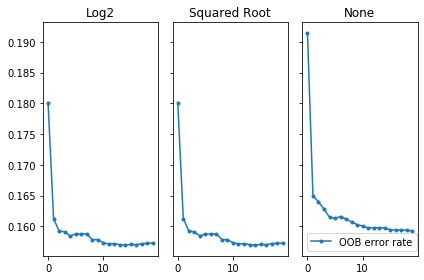

In [13]:
plt.figure(figsize=(12, 4));
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True);
axs[0].plot(lista_log2, '.-', label='OOB error rate');
axs[0].set_title('Log2');
axs[1].plot(lista_sqrt,'.-',label='OOB error rate');
axs[1].set_title('Squared Root');
axs[2].plot(lista_none, '.-', label='OOB error rate');
axs[2].set_title('None');
plt.tight_layout();
plt.legend();

__max_feature `log2` y `sqrt` generan los mismos oob_score___

__Ejercicio 5: Refactorice el modelo__
- En base a la mejor combinación de hiperparámetros, reentrene el modelo y comente su desempeño.

- __La siguiente función determina el n_estimator con el menor oob_score__

In [ ]:
def minimo(lista1,lista2,lista3):
    min1=np.minimum((lista1),(lista2))
    min2=np.minimum(min1,lista3)
    minimo=min(min2)
    indice=lista2.index(minimo)
    cont=0
    for i in range(20,1000,50):
        cont+=1
        if cont==indice:
            print("n_estimators: ",i)
            break;
    return i

__Comenzando, con determinar el minimo oob_score___


In [15]:
n_estimator_minimo=minimo(lista_none,lista_log2,lista_sqrt)

n_estimators:  670


__Se halla en el n_estimators:670__

In [20]:
mejor_rf=RandomForestRegressor(max_features='log2',n_estimators=670,oob_score=True,random_state = 1).fit(X_train_pablo, y_train_pablo)

In [55]:
print("El mejor randomForest score entregado por este modelo sería: ",(mejor_rf.score(X_test_pablo,y_test_pablo).round(5)))

El mejor randomForest score entregado por este modelo sería:  0.81037


__Inspeccionando nuevamente los modelos RandomForestRegressor__

In [28]:
rf_pablo1= RandomForestRegressor(max_features=None,n_estimators=i,oob_score=True,random_state = 1)
error_rate = {}
for i in range(20,1000,50):
    rf_pablo1.set_params(n_estimators=i)
    rf_pablo1.fit(X_train_pablo, y_train_pablo)
    oob_error = 1 - rf_pablo1.oob_score_
    error_rate[i] = oob_error

In [29]:
rf_pablo2= RandomForestRegressor(max_features='log2',n_estimators=i,oob_score=True,random_state = 1)
error_rate2 = {}
for i in range(20,1000,50):
    rf_pablo2.set_params(n_estimators=i)
    rf_pablo2.fit(X_train_pablo, y_train_pablo)
    oob_error = 1 - rf_pablo2.oob_score_
    error_rate2[i] = oob_error

In [61]:
oob_series = pd.Series(error_rate)
oob_series2 = pd.Series(error_rate2)
print('None:',min(oob_series))
print('log2:',min(oob_series2))

None: 0.15928593157606208
log2: 0.15695998958600743


-__El modelo log2 entrega un oob_score menor__

In [64]:
menor=min(error_rate2.values())
for key in error_rate2:
    if error_rate2[key].round(5)==menor.round(5):
        n_stimator=key
        #print(key, ":", error_rate2[key])

print("Los hyperparámetros encontrado para n_stimator es:\n","n_estimator:",n_stimator)


Los hyperparámetros encontrado para n_stimator es:
 n_estimator: 720


In [123]:
rf_pablo1= RandomForestRegressor(max_features='log2',n_estimators=720,oob_score=True,random_state = 1).fit(X_train_pablo, y_train_pablo)
print("El mejor randomForest score entregado por este modelo sería: ",(rf_pablo1.score(X_test_pablo,y_test_pablo).round(5)))

El mejor randomForest score entregado por este modelo sería:  0.81054


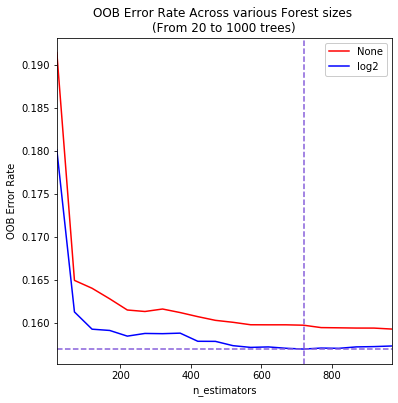

In [49]:
# Convert dictionary to a pandas series for easy plotting
oob_series = pd.Series(error_rate)
oob_series2 = pd.Series(error_rate2)
#oob_series3 = pd.Series(error_rate3)
fig, ax = plt.subplots(figsize=(6, 6))
oob_series.plot(kind='line',color = 'red',label="None")
oob_series2.plot(kind='line',color = 'blue',label="log2")
#oob_series3.plot(kind='line',color = 'green',label="sqrt")
#plt.axhline(0.192,color='#875FDB',linestyle='--')
plt.axhline(menor,color='#875FDB',linestyle='--')
plt.axvline(720,color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 20 to 1000 trees)')
plt.legend(framealpha=1, frameon=True)

- De esta forma podemos señalar que hay una diferencia entre el modelo realizado con n_stimator n=670 y n=720

__Evaluando Scores de diferentes modelos randomForestRegression realizados__

In [27]:
estimators = np.arange(20, 1000, 50)
scores_log = []
scores_none = []
model_log= RandomForestRegressor(max_features='log2',random_state = 1)
model_none= RandomForestRegressor(max_features=None,random_state = 1)
for n in estimators:
    model_log.set_params(n_estimators=n)
    model_log.fit(X_train_pablo, y_train_pablo)
    scores_log.append(model_log.score(X_test_pablo, y_test_pablo))
    model_none.set_params(n_estimators=n)
    model_none.fit(X_train_pablo, y_train_pablo)
    scores_none.append(model_none.score(X_test_pablo, y_test_pablo))

In [117]:
mayor=max(scores_log)
listado=list(zip(estimators,scores_log))
lista_n=[]
for i in listado:
    if i[1]==mayor:
        mayor_n=i[0]
print("El mayor score es en con el n_estimators es de:",mayor_n)

El mayor score es en con el n_estimators es de: 270


__Graficando los score para los modelos realizados y destando el max(score) en la grafica, se tiene:__

No handles with labels found to put in legend.


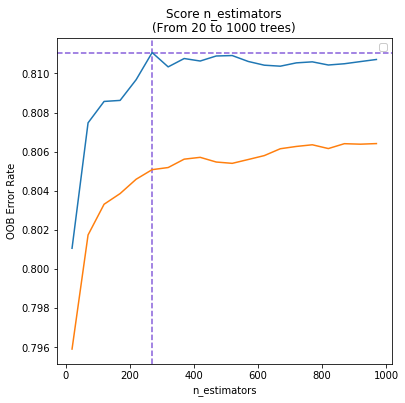

In [121]:
fig, ax = plt.subplots(figsize=(6, 6))
#oob_series3.plot(kind='line',color = 'green',label="sqrt")
#plt.axhline(0.192,color='#875FDB',linestyle='--')
plt.axhline(mayor,color='#875FDB',linestyle='--')
plt.axvline(270,color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('Score n_estimators\n(From 20 to 1000 trees)')
plt.legend(framealpha=1, frameon=True)
plt.plot(estimators, scores_log)
plt.plot(estimators, scores_none)

In [118]:
rf_pablo1= RandomForestRegressor(max_features='log2',n_estimators=270,oob_score=True,random_state = 1).fit(X_train_pablo, y_train_pablo)
print("El mejor randomForest score entregado por este modelo sería: ",(rf_pablo1.score(X_test_pablo,y_test_pablo).round(5)))

El mejor randomForest score entregado por este modelo sería:  0.81107


# __Analisis:__
### - Inicialmente se pensó, en realizar un modelo con el menor oob_score que se encontró en n_estimators=670, obteniendo una métrica score de 0.81037, sin embargo, no fue la mejor métrica score para randomForestRegression. Luego, se realizó otro procedimiento que dió cuenta que el menor oob_score se encontró en n_estimator=720, y su score fue de 0.81054, algo mejor pero no significativo. Es por ello, que se pricedió a graficar todos los score (sin tener en cuenta el oob_score) y obtener el n_estimators con el mejor score se encontró en n=270, obteniendo una métrica de 0.81107.
    

In [127]:
modelos=['Modelo 1','Modelo 2','Modelo 3'] 
n_estimators=[670,720,270]
score=[0.81037,0.81054,0.81107]
oob_score=['Si','Si','No']
listado = list(zip(modelos,n_estimators,score,oob_score))
pd.DataFrame(listado, columns = ['Modelos','n_estimators','Score','oob_score'])

,Modelos,n_estimators,Score,oob_score
0,Modelo 1,670,0.81037,Si
1,Modelo 2,720,0.81054,Si
2,Modelo 3,270,0.81107,No


 * oob_score, significa que el modelo que se realizó se basó en está métrica.